In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv


--2025-05-25 16:06:01--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  2.39MB/s    in 1.4s    

2025-05-25 16:06:04 (2.39 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [288]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt


## Load Data

In [138]:
df = pd.read_csv("AirlineTweets.csv")
df = df[['text', 'airline_sentiment']]

In [140]:
df['target'] = df.loc[:, 'airline_sentiment'].map({
    'negative': -1,
    'neutral': 0,
    'positive': 1})

# Multi-class classification (Negative, Neutral, Positive)

## Split Train and Test

In [193]:
Xtrain_text, Xtest_text, ytrain, ytest = train_test_split(df['text'], df['target'], test_size = 0.2, stratify = df['target'],)
tfidf_vectorizer = TfidfVectorizer()
Xtrain = tfidf_vectorizer.fit_transform(Xtrain_text)
model_logr = LogisticRegression(class_weight='balanced', max_iter = 500)
model_logr.fit(Xtrain, ytrain)

LogisticRegression(class_weight='balanced', max_iter=500)

## Predict test and train target

In [196]:
pr_ytrain = model_logr.predict(Xtrain)
Xtest = tfidf_vectorizer.transform(Xtest_text)
pr_ytest = model_logr.predict(Xtest)

In [198]:
print("F1 score train: ", f1_score(ytrain, pr_ytrain, average='macro'))
print("F1 score test: ", f1_score(ytest, pr_ytest, average='macro'))

F1 score train:  0.8626324801498167
F1 score test:  0.7444702195087127


In [200]:
P_train = model_logr.predict_proba(Xtrain)
P_test = model_logr.predict_proba(Xtest)

In [202]:
print("AUC train: ", roc_auc_score(ytrain, P_train, multi_class='ovo'))
print("AUC test: ", roc_auc_score(ytest, P_test, multi_class='ovo'))

AUC train:  0.9715107477740587
AUC test:  0.9068001199581541


In [204]:
confusion_matrix(ytrain, pr_ytrain, normalize = 'true')

array([[0.8679014 , 0.09886967, 0.03322893],
       [0.07543364, 0.87656313, 0.04800323],
       [0.03015873, 0.03809524, 0.93174603]])

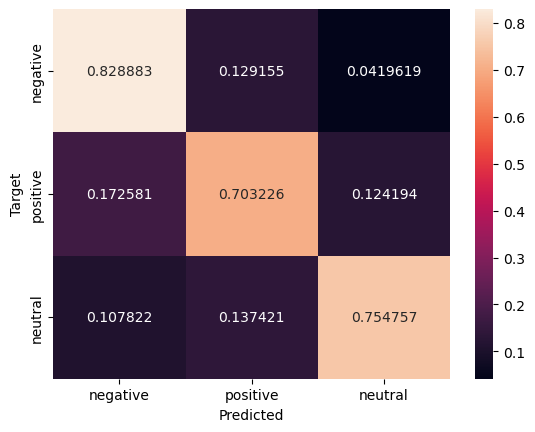

In [206]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(confusion_matrix(ytest, pr_ytest, normalize = 'true'))


# Binary classification (Negative, Positive)

In [266]:
df_binary = df[df['target'] != 0]
df_binary['target'] = df_binary.loc[:, 'airline_sentiment'].map({
    'negative': 0,
    'positive': 1})

Xtrain_textb, Xtest_textb, ytrainb, ytestb = train_test_split(df_binary['text'], df_binary['target'], test_size = 0.2, stratify = df_binary['target'])

tfidf_vectorizer_2 = TfidfVectorizer()
Xtrainb = tfidf_vectorizer_2.fit_transform(Xtrain_textb)
model_logr_2 = LogisticRegression(class_weight='balanced')
model_logr_2.fit(Xtrainb, ytrainb)

/var/folders/yy/p2cg773j6dz53c7j5y7s_tx80000gn/T/ipykernel_34460/456186976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['target'] = df_binary.loc[:, 'airline_sentiment'].map({


LogisticRegression(class_weight='balanced')

In [268]:
pr_ytrainb = model_logr_2.predict(Xtrainb)

Xtestb = tfidf_vectorizer_2.transform(Xtest_textb)
pr_ytestb = model_logr_2.predict(Xtestb)

In [270]:
print("F1 score trainb: ", f1_score(ytrainb, pr_ytrainb, average='macro'))
print("F1 score testb: ", f1_score(ytestb, pr_ytestb, average='macro'))

F1 score trainb:  0.9250941957833644
F1 score testb:  0.8769304569136673


In [272]:
P_trainb = model_logr_2.predict_proba(Xtrainb)
P_testb = model_logr_2.predict_proba(Xtestb)

In [274]:
print("AUC train: ", roc_auc_score(ytrainb, P_trainb[:, 1]))
print("AUC test: ", roc_auc_score(ytestb, P_testb[:, 1]))

AUC train:  0.9884843165148259
AUC test:  0.9571064037548306


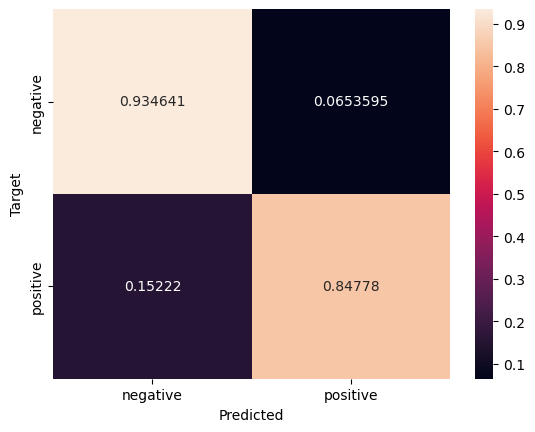

In [276]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(confusion_matrix(ytestb, pr_ytestb, normalize = 'true'))

In [284]:
model_logr_2.coef_.shape

(1, 11151)

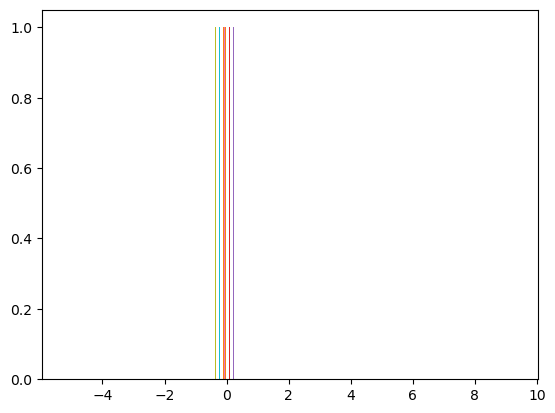

In [302]:
plt.hist(model_logr_2.coef_, bins=100);

In [303]:
word_index_map = tfidf_vectorizer_2.vocabulary_
word_index_map

{'usairways': 10498,
 'why': 10858,
 'didn': 3551,
 'you': 11078,
 'reroute': 8359,
 'bos': 2252,
 'to': 9932,
 'jax': 5753,
 'via': 10597,
 'dca': 3368,
 'through': 9852,
 'clt': 2832,
 'instead': 5590,
 'forcing': 4564,
 'an': 1563,
 'overnight': 7362,
 'passengerslose': 7465,
 'united': 10366,
 'ok': 7206,
 'have': 5084,
 'sent': 8815,
 'info': 5542,
 'dm': 3687,
 'appreciate': 1674,
 'your': 11086,
 'help': 5135,
 'and': 1569,
 'consideration': 3049,
 'no': 6990,
 'way': 10747,
 'of': 7177,
 'making': 6416,
 'phones': 7591,
 'calls': 2490,
 'need': 6899,
 'handle': 5024,
 'twitter': 10156,
 'email': 3934,
 'web': 10765,
 'thank': 9752,
 'southwestair': 9193,
 'fortunemagazine': 4591,
 'love': 6312,
 'flying': 4519,
 'southwest': 9192,
 'best': 2103,
 'flight': 4445,
 'attendants': 1806,
 'ever': 4090,
 'now': 7105,
 've': 10568,
 'lost': 6293,
 'my': 6825,
 'bags': 1963,
 'too': 9963,
 'at': 1785,
 'least': 6094,
 'nobody': 6999,
 'has': 5068,
 'done': 3721,
 'anything': 1633,
 'ou

In [306]:
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model_logr_2.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
appreciate 3.2532544486208246
thank 9.02772214098003
southwestair 4.058488930704061
love 4.878881798654109
best 4.001058472055191
thx 2.988512444971678
cool 2.16861619935237
thanks 9.315530828902858
jetblue 3.553896448114368
amazing 3.7190769252202776
great 6.103838243549148
crew 2.179660969054448
virginamerica 3.3741619256278397
well 2.2514343363666796
nice 2.355710638150496
awesome 4.272845815676468
helpful 2.411554234184046
excellent 2.6862290136464617
happy 2.2228009529850343
kudos 3.5332281791992495
good 3.340919317533351
made 2.10013047952793
worries 3.414418347172666
impressed 2.0394705761362215
favorite 2.008504215209258


In [308]:
threshold = 2

print("Most negative words:")
for word, index in word_index_map.items():
    weight = model_logr_2.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
why -2.5867072982918384
no -4.108787225936903
flight -2.048195020662607
is -2.6723168010265064
not -5.240487632104106
hours -4.021560766594233
can -2.3293615630198903
call -2.1848739162627426
what -2.590610633826758
hour -2.501555892695231
days -2.0108882799353696
delayed -3.574391431347936
don -2.0257036440304907
hold -3.8280784975288737
cancelled -3.2314781579349643
flightled -2.106041522896423
how -2.018241677068961
hrs -2.2127653301026897
worst -3.6917383390291074
because -2.2411557384850087
delay -2.193951278746596
rude -2.223627694139655
nothing -2.309777041179296
luggage -2.407917892811991
doesn -2.096143605752955
